# Linear Regression -Complete
A machine learning algorithm used to predict output values based on input values, provided thre exists an optimal linear relationshipbetween them

Characteristics of data:
1. Numeric
2. Continuous

# How to find whether Linear Regression to be applied?
Is the dataset supervised? (having output column?)
Is the output column continuous?
yes!!! You may use Linear Regression

# is  dataset linear?
Use correlation
Plot scatter chart
may use pair plots

In [18]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df=pd.read_csv(r"C:\Users\DR.Noor Mahammad SK\Downloads\forestfires.csv")
print(df.shape)
print(df.info())

(517, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None


0.0
1090.84


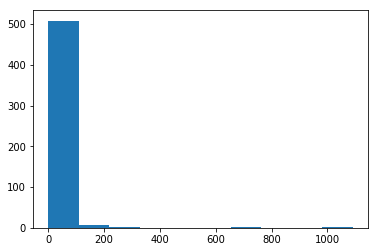

In [20]:
print(df['area'].min())
print(df['area'].max())
plt.hist(df['area'])
plt.show()

# Draw Scatter Plot

C:\Users\DR.Noor Mahammad SK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


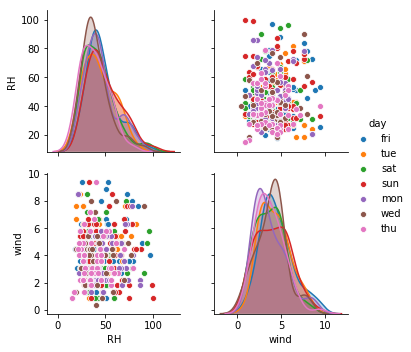

In [21]:
sb.pairplot(df,vars=['RH','wind'],hue='day')
#vars=['X','Y']


In [22]:
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7),inplace=True)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


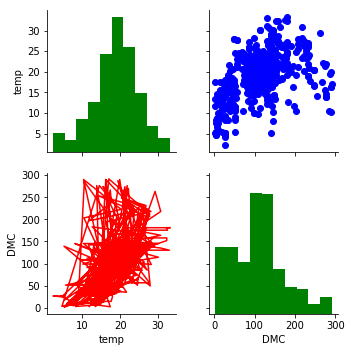

In [23]:
g=sb.PairGrid(data=df,vars=['temp','DMC'])
g.map_upper(plt.scatter,color='blue')
g.map_lower(plt.plot,color='red')
g.map_diag(plt.hist,color='green')

              X         Y     month       day      FFMC       DMC        DC  \
X      1.000000  0.539548 -0.065003 -0.024922 -0.021039 -0.048384 -0.085916   
Y      0.539548  1.000000 -0.066292 -0.005453 -0.046308  0.007782 -0.101178   
month -0.065003 -0.066292  1.000000 -0.050837  0.291477  0.466645  0.868698   
day   -0.024922 -0.005453 -0.050837  1.000000 -0.041068  0.062870  0.000105   
FFMC  -0.021039 -0.046308  0.291477 -0.041068  1.000000  0.382619  0.330512   
DMC   -0.048384  0.007782  0.466645  0.062870  0.382619  1.000000  0.682192   
DC    -0.085916 -0.101178  0.868698  0.000105  0.330512  0.682192  1.000000   
ISI    0.006210 -0.024488  0.186597  0.032909  0.531805  0.305128  0.229154   
temp  -0.051258 -0.024103  0.368842  0.052190  0.431532  0.469594  0.496208   
RH     0.085223  0.062221 -0.095280  0.092151 -0.300995  0.073795 -0.039192   
wind   0.018798 -0.020341 -0.086368  0.032478 -0.028485 -0.105342 -0.203466   
rain   0.065387  0.033234  0.013438 -0.048340  0.056

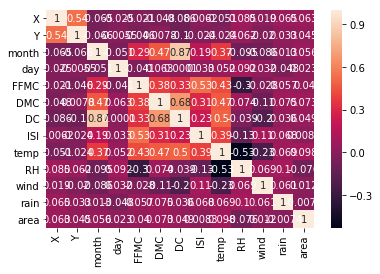

In [5]:
df1=df.corr()
print(df1)
sb.heatmap(df1,annot=True)

In [24]:
df['X'].isnull().sum()
#df.isnull().sum()

0

In [25]:
df['Y']=df['X'].apply(lambda x:np.nan if x==1 else x)

print(df[df['X']==1].head())
print(df['Y'].isnull().sum())


    X   Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
77  1 NaN      3    1  87.6   52.2  103.8   5.0   8.3  72   3.1   0.0   0.0
78  1 NaN      8    5  90.1  108.0  529.8  12.5  14.7  66   2.7   0.0   0.0
79  1 NaN      8    2  91.0  121.2  561.6   7.0  21.6  19   6.7   0.0   0.0
80  1 NaN      8    7  91.4  142.4  601.4  10.6  19.5  39   6.3   0.0   0.0
81  1 NaN      8    7  90.2   99.6  631.2   6.3  17.9  44   2.2   0.0   0.0
48


In [13]:
#print(df[(df['X']==1)].count())
#target=(df['Y'].mean())
#print(target)
#df['Y'][df['FFMC']>90.0]=target
#print(df['Y'].isnull().sum())
#print(df[(df['X']==1)&(df['FFMC']<=90)])

X        48
Y         0
month    48
day      48
FFMC     48
DMC      48
DC       48
ISI      48
temp     48
RH       48
wind     48
rain     48
area     48
dtype: int64
5.044776119402985
4
     X   Y  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain   area
77   1 NaN      3    1  87.6  52.2  103.8  5.0   8.3  72   3.1   0.0   0.00
143  1 NaN      7    6  90.0  51.3  296.3  8.7  16.6  53   5.4   0.0   0.71
217  1 NaN      9    1  88.6  91.8  709.9  7.1  12.4  73   6.3   0.0  30.32
305  1 NaN      9    7  89.6  84.1  714.3  5.7  19.0  52   2.2   0.0   0.00


C:\Users\DR.Noor Mahammad SK\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [26]:
df.isnull().sum()
target=(df['Y'].mean())
print(target)
df.fillna(df['Y'].mean(),inplace=True)
df.isnull().sum()

5.044776119402985


X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [27]:
print(df[(df['X']==1)].count())


X        48
Y        48
month    48
day      48
FFMC     48
DMC      48
DC       48
ISI      48
temp     48
RH       48
wind     48
rain     48
area     48
dtype: int64


In [28]:
target=(df['Y'].mean())
print(target)
df['Y'][df['FFMC']>90.0]=target
print(df['Y'].isnull().sum())

5.04477611940299
0


C:\Users\DR.Noor Mahammad SK\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
#print(df[(df['X']==1)&(df['FFMC']<=90)])

     X         Y  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  \
77   1  5.070786      3    1  87.6  52.2  103.8  5.0   8.3  72   3.1   0.0   
143  1  5.070786      7    6  90.0  51.3  296.3  8.7  16.6  53   5.4   0.0   
217  1  5.070786      9    1  88.6  91.8  709.9  7.1  12.4  73   6.3   0.0   
305  1  5.070786      9    7  89.6  84.1  714.3  5.7  19.0  52   2.2   0.0   

      area  
77    0.00  
143   0.71  
217  30.32  
305   0.00  


In [29]:
df.fillna(df['Y'].mean(),inplace = True)
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [30]:
print(df.columns)
print(df.shape)

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')
(517, 13)


# Input and Output Splitting

In [31]:
from sklearn import linear_model
regress=linear_model.LinearRegression()
df2=df.values
print(df2)
train_x=(df2[:,0:12])
train_y=df2[:,12]
print(train_x.shape)
print(train_y.shape)

[[ 7.          7.          3.         ...  6.7         0.
   0.        ]
 [ 7.          5.04477612 10.         ...  0.9         0.
   0.        ]
 [ 7.          5.04477612 10.         ...  1.3         0.
   0.        ]
 ...
 [ 7.          7.          8.         ...  6.7         0.
  11.16      ]
 [ 1.          5.04477612  8.         ...  4.          0.
   0.        ]
 [ 6.          6.         11.         ...  4.5         0.
   0.        ]]
(517, 12)
(517,)


# MinMax Normalization

In [32]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
train_x=ms.fit_transform(train_x)


# Regression Line Fitting

In [33]:
regress.fit(train_x,train_y)
#The coefficents y=m0x0+m1x1+...+m11x11+c
print('Coefficients:',regress.coef_)
print('Intercept:',regress.intercept_)

Coefficients: [ 17.26509473  -5.04660555  30.45916466   4.47817093  -4.28632999
  28.44711494 -25.61817831 -41.44543676  27.07646712 -17.62655754
  10.64352764 -19.61239729]
Intercept: -9.781937429192746


# Prediction

In [34]:
y_predicted=regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])

0.0 5.6581628657370295
0.0 11.824822365543545
0.0 12.602025928924606
0.0 -6.016763742507937
0.0 -5.647395408609075
0.0 26.312759107996712
0.0 25.888491858030797
0.0 -0.8533549733588135
0.0 14.322958762648058
0.0 22.30404490492998
0.0 19.454196609726367
0.0 6.320536747203819
0.0 13.02203987679606
0.0 16.86460627924005
0.0 28.40941017690247
0.0 20.00015890300883
0.0 11.992434126931792
0.0 14.742569750730778
0.0 9.37716059601494
0.0 7.57186091232086
0.0 16.110420839323638
0.0 6.695905412738936
0.0 -7.568256198517527
0.0 26.048484736903504
0.0 22.47417693829931
0.0 17.858520129561825
0.0 21.710309816189763
0.0 15.059973455267764
0.0 32.52221966196982
0.0 24.940189542073938
0.0 17.8122694220677
0.0 2.2521831998182886
0.0 13.951748109769254
0.0 13.90612457902884
0.0 11.926584344729234
0.0 8.23245256840252
0.0 19.011753992218566
0.0 5.291845538522228
0.0 19.825314860584413
0.0 2.781182499588784
0.0 20.194170586913835
0.0 13.913262450438586
0.0 -0.474183334614791
0.0 9.847262775894196
0.0 -1.8

# Plotting

Text(0.5,0,'area')

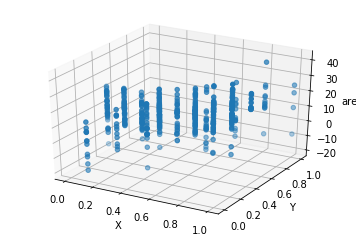

In [35]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(train_x[:,0],train_x[:,1],y_predicted)
#ax=fig.add_subplot(121,projection='3d')
#ax.scatter(train_x[:,0],train_x[:,1],y_predicted)
#ax1=fig.add_subplot(122,projection='3d')
#ax1.scatter(train_x[:,0],train_x[:,1],train_y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('area')


# Metrics

In [36]:
from sklearn import metrics
print('Mean Absolute error ', metrics.mean_absolute_error(train_y,y_predicted))
print('Mean Squared error ', metrics.mean_squared_error(train_y,y_predicted))
print('Root Mean Squared error ', np.sqrt(metrics.mean_squared_error(train_y,y_predicted)))

Mean Absolute error  19.30447199414062
Mean Squared error  3946.991558134103
Root Mean Squared error  62.82508701254701
